## 9.1 A Brief matplotlib API Primer

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

With matplotlib, we use the following import convention:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

[0 1 2 3 4 5 6 7 8 9]


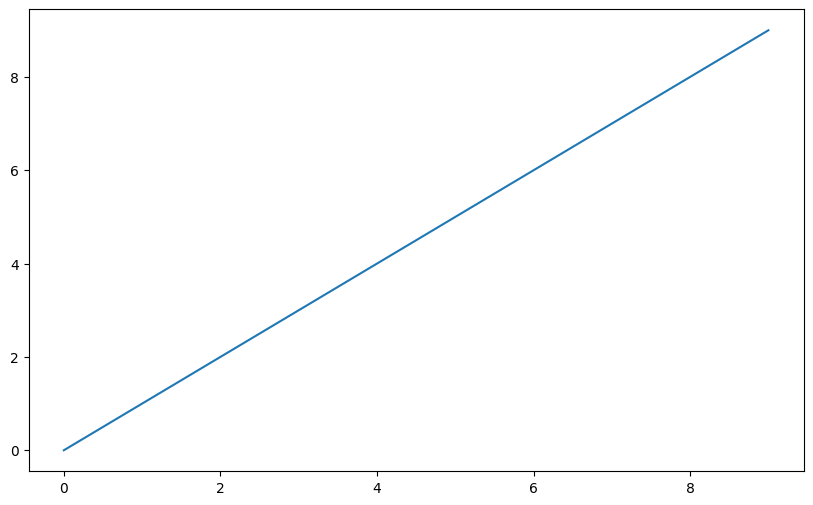

In [3]:
data = np.arange(10)
print(data)
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with
`plt.figure`:

In [4]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

These plot axis objects have various methods that create different types of plots,
and it is preferred to use the axis methods over the top-level plotting functions
like `plt.plot`.

In [9]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")

The additional options instruct matplotlib to plot a black dashed line. The objects
returned by `fig.add_subplot` here are `AxesSubplot` objects, on which you can
directly plot on the other empty subplots by calling each one’s instance method

In [12]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))

In [13]:
plt.close("all")

To make creating a grid of subplots more convenient, matplotlib includes a `plt.subplots` method that creates a new figure and returns a NumPy array containing the
created subplot objects:

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

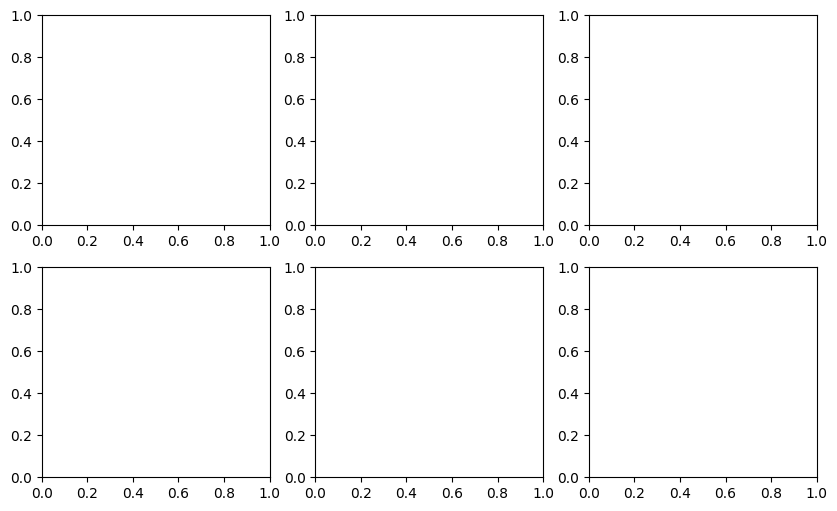

In [14]:
fig, axes = plt.subplots(2, 3)
axes

**Adjusting the spacing around subplots**
You can
change the spacing using the `subplots_adjust` method on Figure objects:

`subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

`wspace` and `hspace` control the percent of the figure width and figure height, respec‐
tively, to use as spacing between subplots.

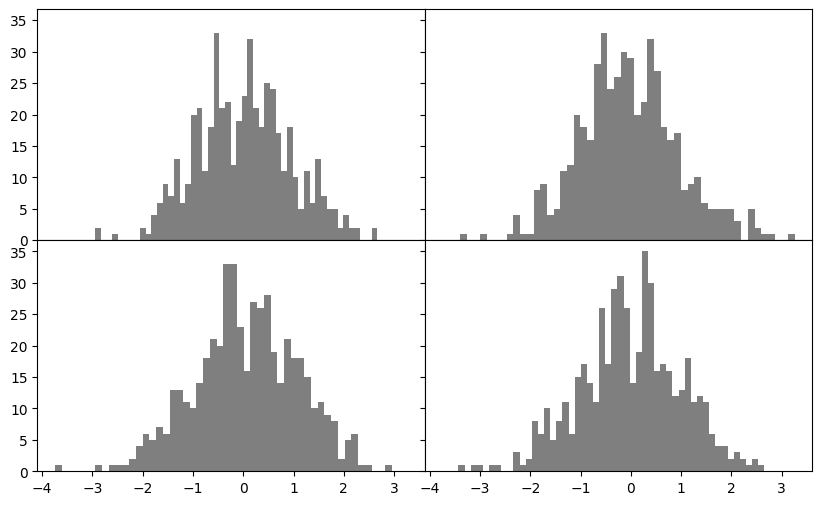

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [16]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [20]:
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o")

In [21]:
plt.close("all")

For line plots, you will notice that subsequent points are linearly interpolated by
default. This can be altered with the `drawstyle` option

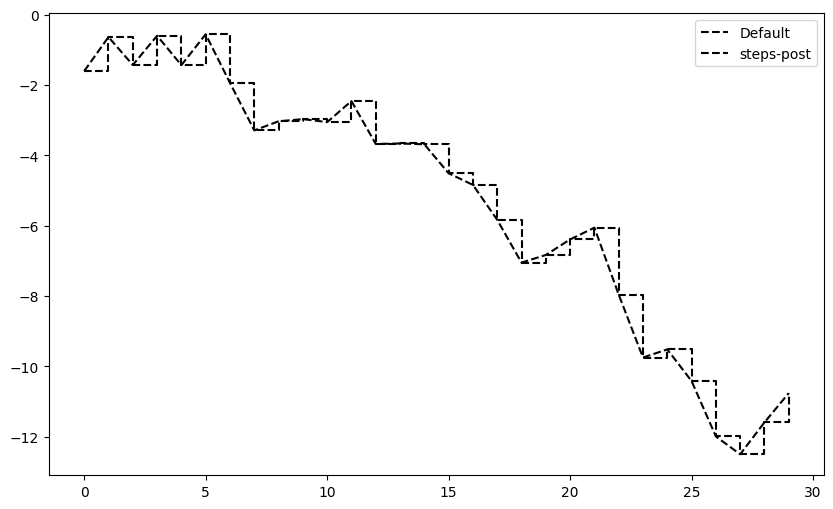

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post")
ax.legend()

### Ticks, Labels, and Legends

**Setting the title, axis labels, ticks, and tick labels**

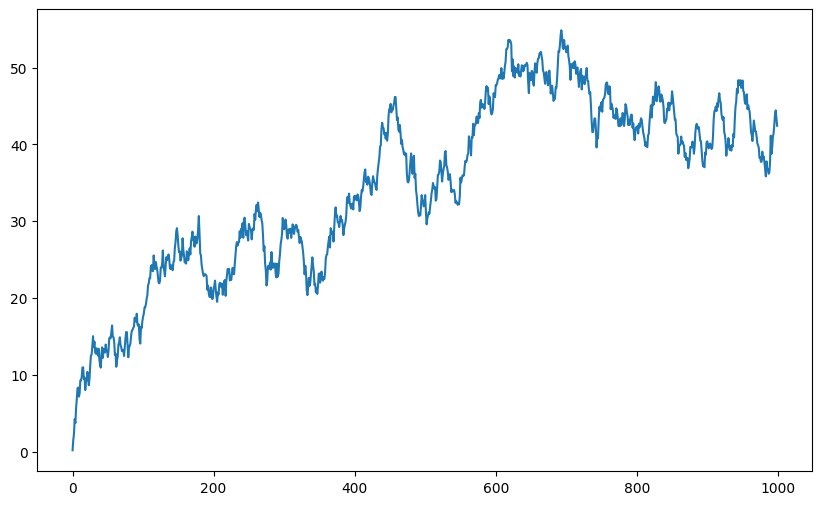

In [23]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

To change the x-axis ticks, it’s easiest to use `set_xticks` and `set_xticklabels`. The
former instructs matplotlib where to place the ticks along the data range; by default
these locations will also be the labels. But we can set any other values as the labels
using `set_xticklabels`:

In [24]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)

The rotation option sets the x tick labels at a 30-degree rotation. Lastly, `set_xlabel`
gives a name to the x-axis, and `set_title` is the subplot title.

In [26]:
print(ax.set_xlabel("Stages"))
ax.set_title("My first matplotlib plot")

Text(0.5, 4.444444444444452, 'Stages')


Text(0.5, 1.0, 'My first matplotlib plot')

**Adding legends**

Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. The easiest is to pass the `label` argument when adding each piece
of the plot:

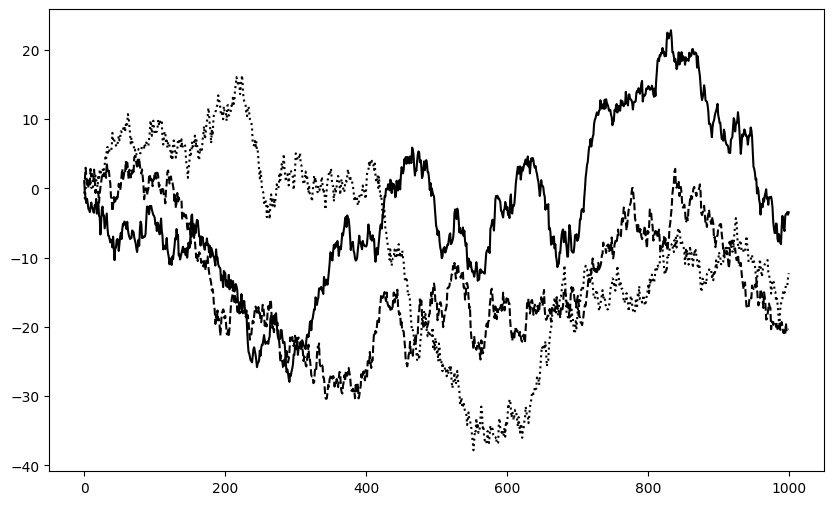

In [27]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three")

Once you’ve done this, you can call `ax.legend()` to automatically create a legend.

In [28]:
ax.legend()

### Annotations and Drawing on a Subplot
In addition to the standard plot types, you may wish to draw your own plot annota‐
tions, which could consist of text, arrows, or other shapes. You can add annotations
and text using the `text`, `arrow`, and `annotate` functions. `text` draws text at given
coordinates (x, y) on the plot with optional custom styling:

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

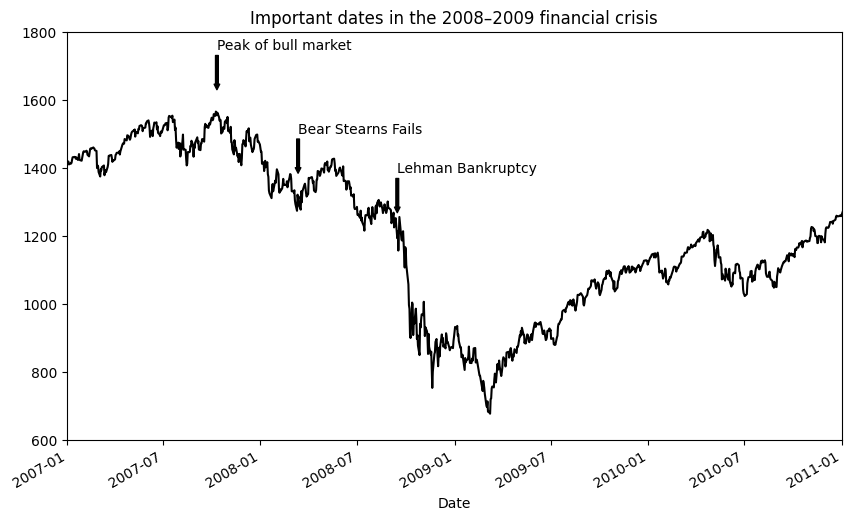

In [30]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

There are a couple of important points to highlight in this plot. The `ax.annotate`
method can draw labels at the indicated x and y coordinates. We use the `set_xlim`
and `set_ylim` methods to manually set the start and end boundaries for the plot
rather than using matplotlib’s default. Lastly, `ax.set_title` adds a main title to the
plot.

In [31]:
ax.set_title("Important dates in the 2008–2009 financial crisis")

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

To add a shape to a plot, you create the patch object and add it to a subplot ax by
passing the patch to `ax.add_patch`

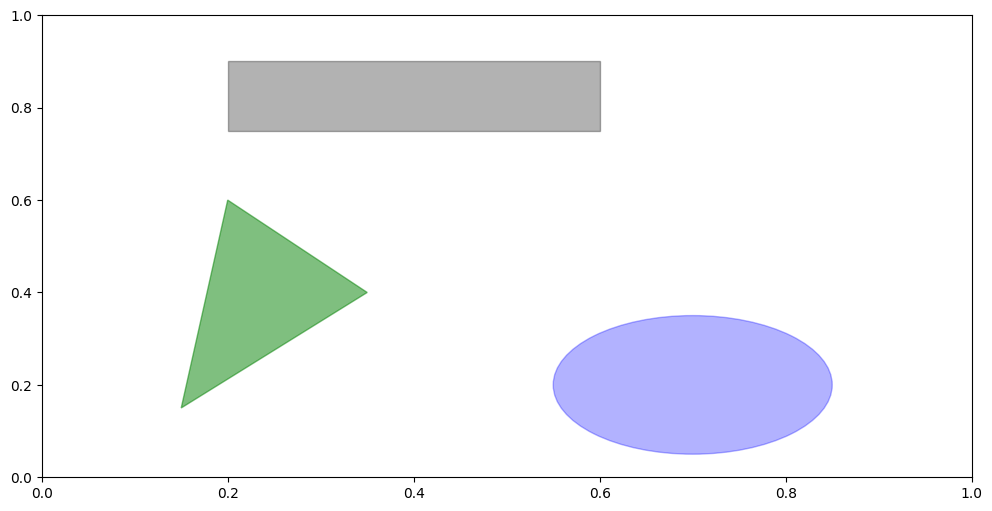

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [33]:
plt.close("all")

### Saving Plots to File
You can save the active figure to file using the figure object’s `savefig` instance method.

`fig.savefig("figpath.svg")`

To get the same plot as a PNG at 400 DPI, you would do:

`fig.savefig("figpath.png", dpi=400)`



### matplotlib Configuration
Fortunately, nearly all of the default
behavior can be customized via global parameters governing figure size, subplot
spacing, colors, font sizes, grid styles, and so on.

for example, to set the global default figure size to be 10 × 10, you could enter:

    plt.rc("figure", figsize=(10, 10))
 
The first argument to rc is the component you wish to customize, such as "figure",
"axes", "xtick", "ytick", "grid", "legend", or many others. After that can follow a
sequence of keyword arguments indicating the new parameters. A convenient way to
write down the options in your program is as a dictionary:

    plt.rc("font", family="monospace", weight="bold", size=8)

## 9.2 Plotting with pandas and seaborn

### Line Plots

<Axes: >

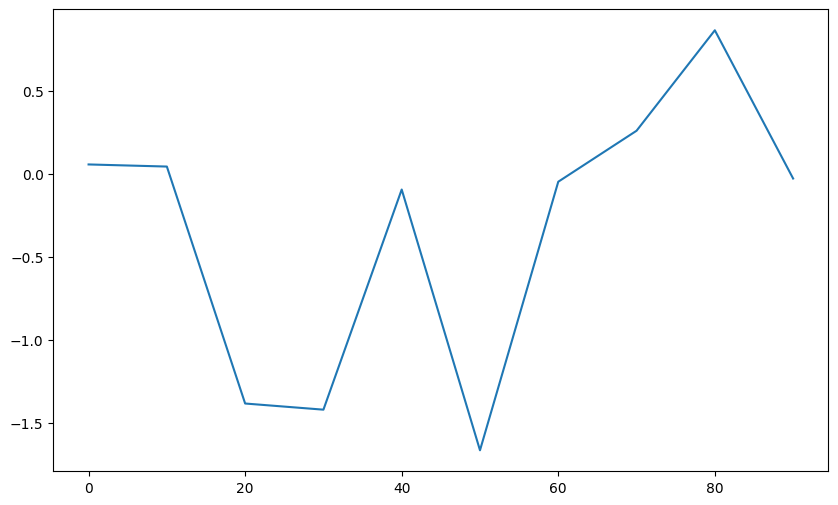

In [34]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The Series object’s index is passed to matplotlib for plotting on the `x-axis`, though
you can disable this by passing `use_index=False`. The x-axis ticks and limits can be
adjusted with the `xticks` and `xlim` options, and the y-axis respectively with `yticks` and `ylim`.

<Axes: >

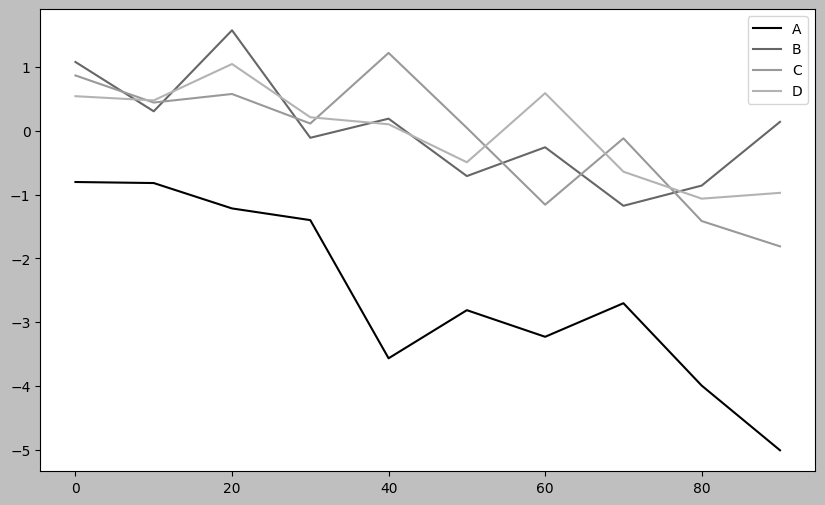

In [35]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

The plot attribute contains a “family” of methods for different plot types. For exam‐
ple, `df.plot()` is equivalent to `df.plot.line()`. We’ll explore some of these methods
next.

### Bar Plots
The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respec‐
tively.

<Axes: >

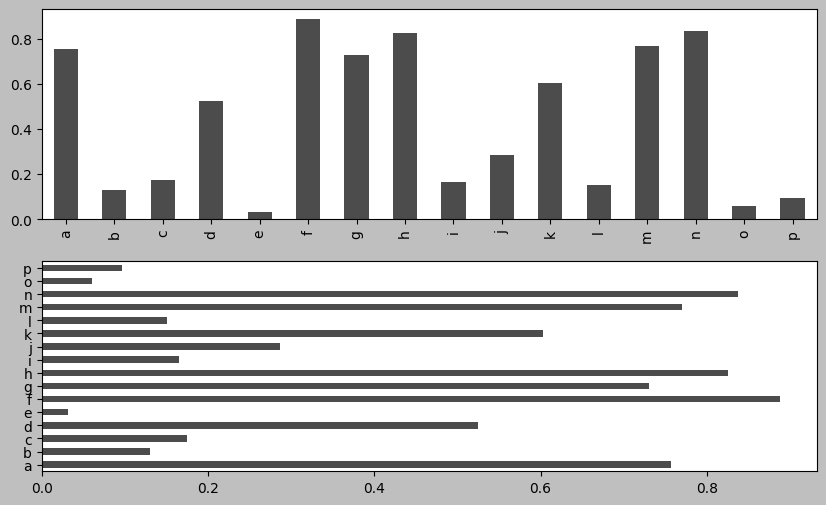

In [36]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [37]:
np.random.seed(12348)

With a DataFrame, bar plots group the values in each row in bars, side by side, for
each value.

<Axes: >

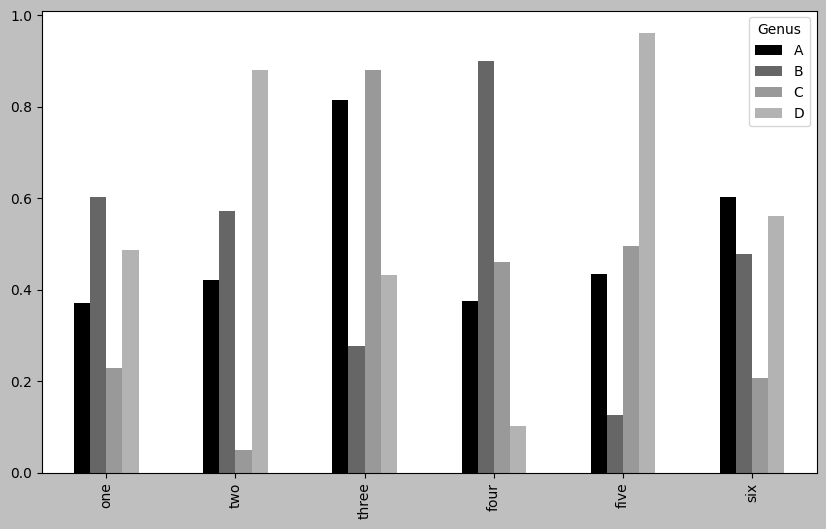

In [38]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df
df.plot.bar()

In [39]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

We create stacked bar plots from a DataFrame by passing `stacked=True`, resulting in
the value in each row being stacked together horizontally

<Axes: >

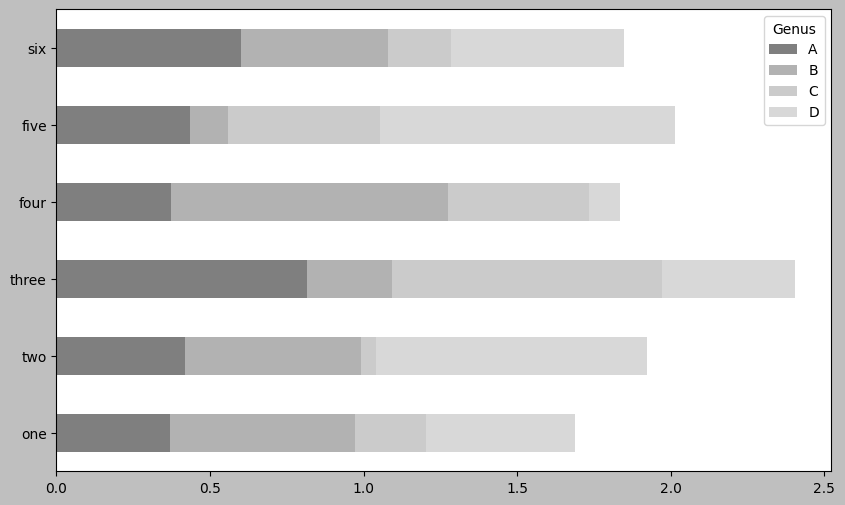

In [40]:
df.plot.barh(stacked=True, alpha=0.5)

In [41]:
plt.close("all")

Let’s have a look at an example dataset about restaurant tipping. Suppose we wanted
to make a stacked bar plot showing the percentage of data points for each party size
for each day. I load the data using `read_csv` and make a cross-tabulation by day and
party size. The `pandas.crosstab`
 function is a convenient way to compute a simple
frequency table from two DataFrame columns:

In [43]:
tips = pd.read_csv("tips.csv")
print(tips.head())
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4


size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


Since there are not many one- and six-person parties, I remove them here:

In [44]:
party_counts = party_counts.loc[:, 2:5]

Then, normalize so that each row sums to 1, and make the plot

size         2         3         4         5
day                                         
Thur  0.827586  0.068966  0.086207  0.017241
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000


<Axes: xlabel='day'>

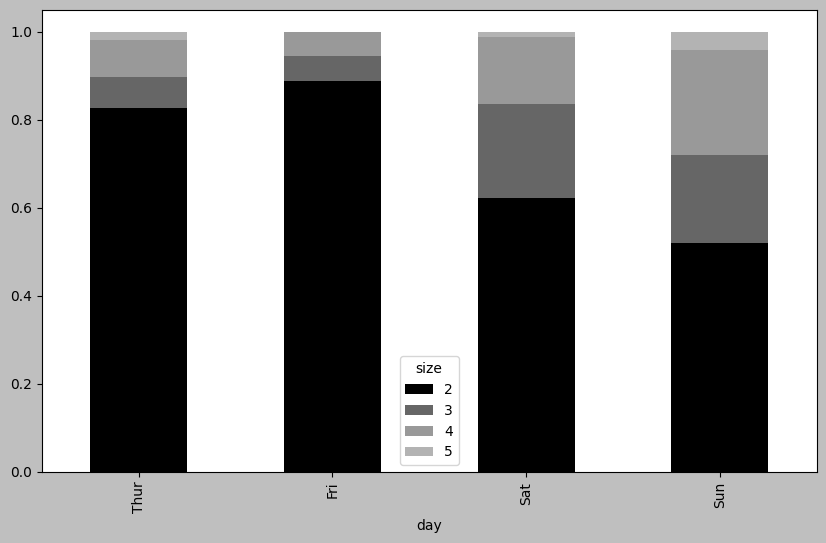

In [46]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
print(party_pcts)

party_pcts.plot.bar(stacked=True)

In [47]:
plt.close("all")

With data that requires aggregation or summarization before making a plot, using the
seaborn package can make things much simpler. Let’s look now at the tipping percentage by day with seaborn:

<Axes: xlabel='tip_pct', ylabel='day'>

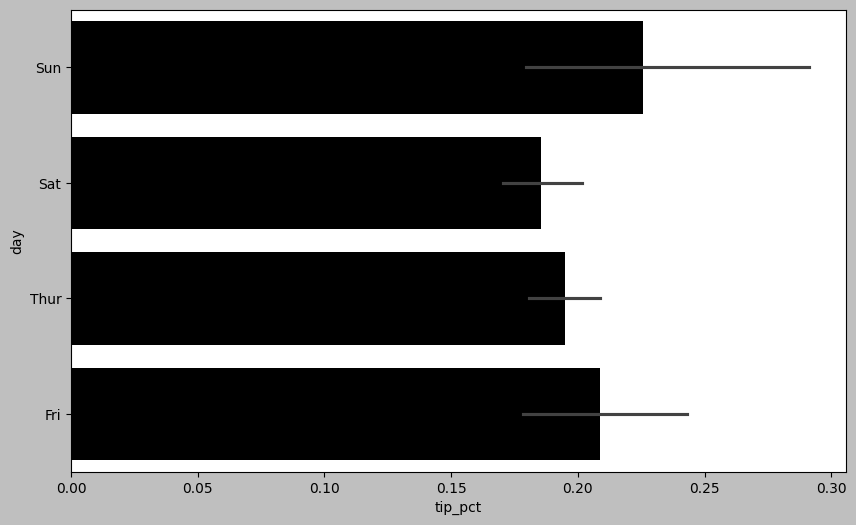

In [48]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [49]:
plt.close("all")

seaborn.barplot has a `hue` option that enables us to split by an additional categorical

<Axes: xlabel='tip_pct', ylabel='day'>

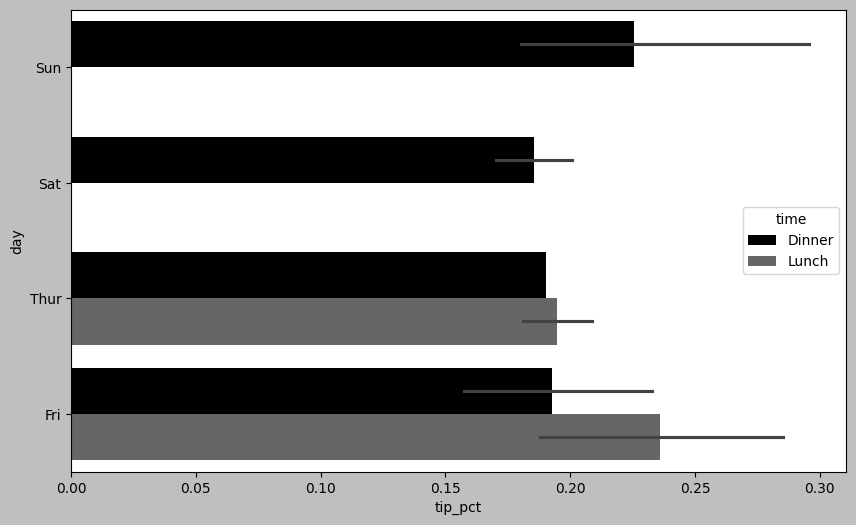

In [50]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [51]:
plt.close("all")

Notice that seaborn has automatically changed the aesthetics of plots: the default
color palette, plot background, and grid line colors. You can switch between different
plot appearances using `seaborn.set_style`:

In [52]:
sns.set_style("whitegrid")

When producing plots for black-and-white print medium, you may find it useful to
set a greyscale color palette, like so:

In [53]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Histograms and Density Plots
A *histogram* is a kind of bar plot that gives a discretized display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data
points in each bin is plotted. Using the tipping data from before, we can make a
histogram of tip percentages of the total bill using the `plot.hist `method on the
Series

<Axes: ylabel='Frequency'>

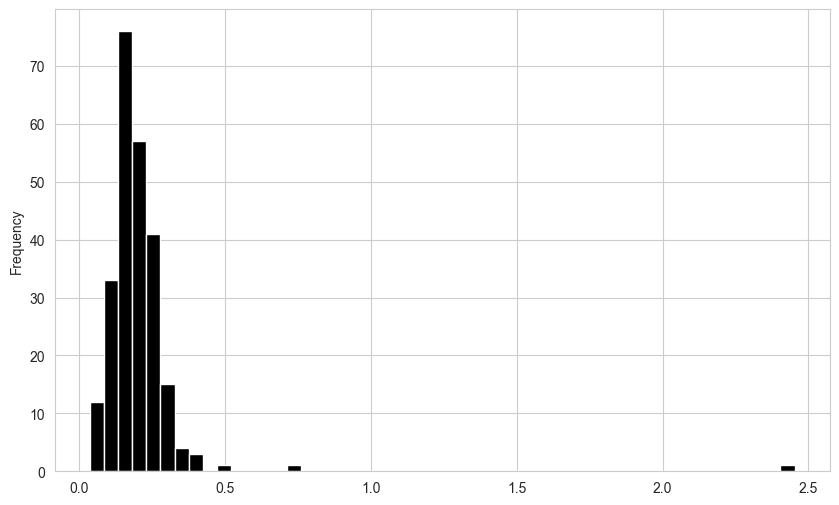

In [54]:
tips["tip_pct"].plot.hist(bins=50)

In [55]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Using `plot.density` makes a density plot
using the conventional mixture-of-normals estimate

<Axes: ylabel='Density'>

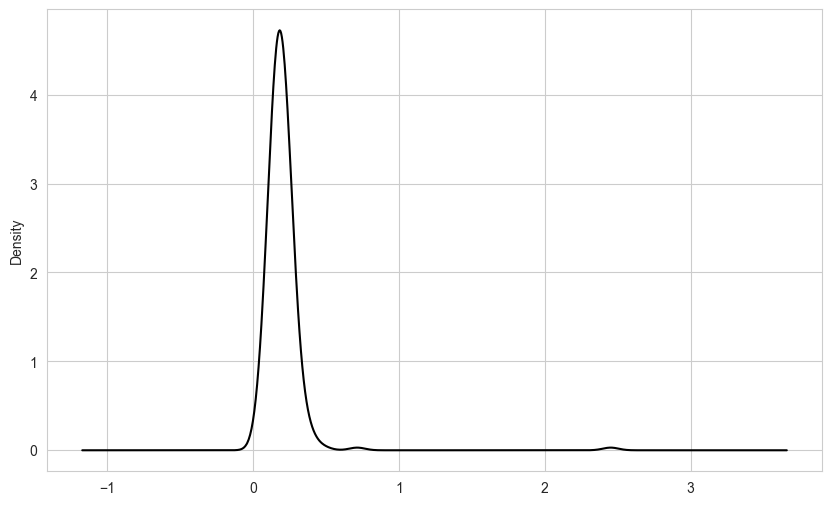

In [56]:
tips["tip_pct"].plot.density()

In [57]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

This kind of plot requires SciPy, so if you do not have it installed already, you can
pause and do that now:

    conda install scipy

seaborn makes histograms and density plots even easier through its `histplot`
method, which can plot both a histogram and a continuous density estimate simulta‐
neously.

<Axes: ylabel='Count'>

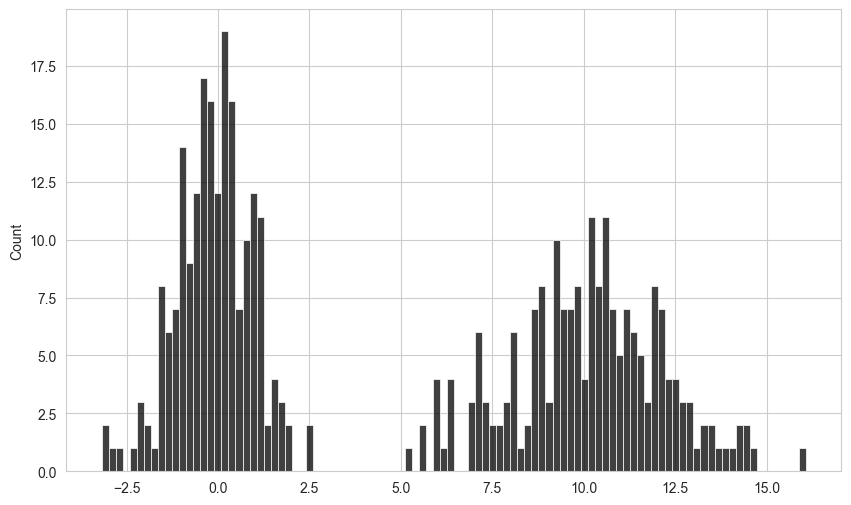

In [58]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

### Scatter or Point Plots
Point plots or scatter plots can be a useful way of examining the relationship between
two one-dimensional data series.

In [60]:
macro = pd.read_csv("macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [61]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

We can then use seaborn’s `regplot` method, which makes a scatter plot and fits a
linear regression line

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

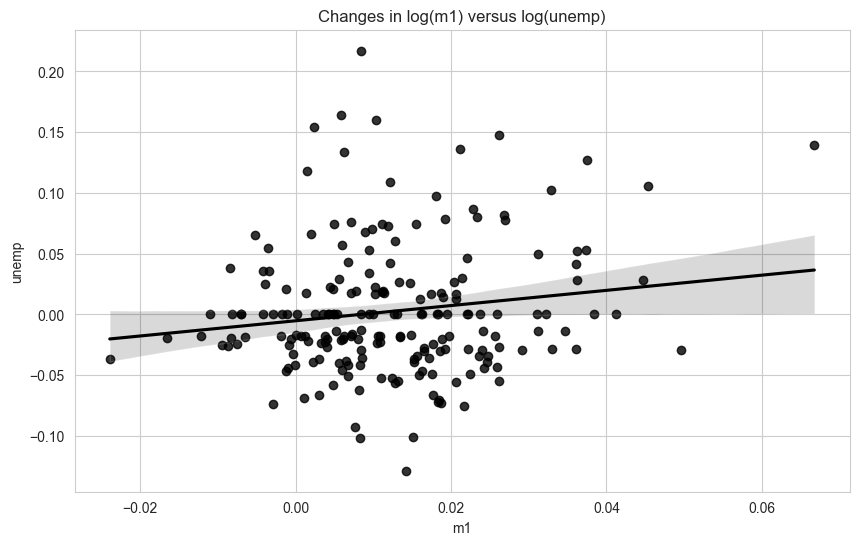

In [62]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

In exploratory data analysis, it’s helpful to be able to look at all the scatter plots
among a group of variables; this is known as a *pairs* plot or *scatter plot matrix*. Mak‐
ing such a plot from scratch is a bit of work, so seaborn has a convenient `pairplot`
function that supports placing histograms or density estimates of each variable along
the diagonal

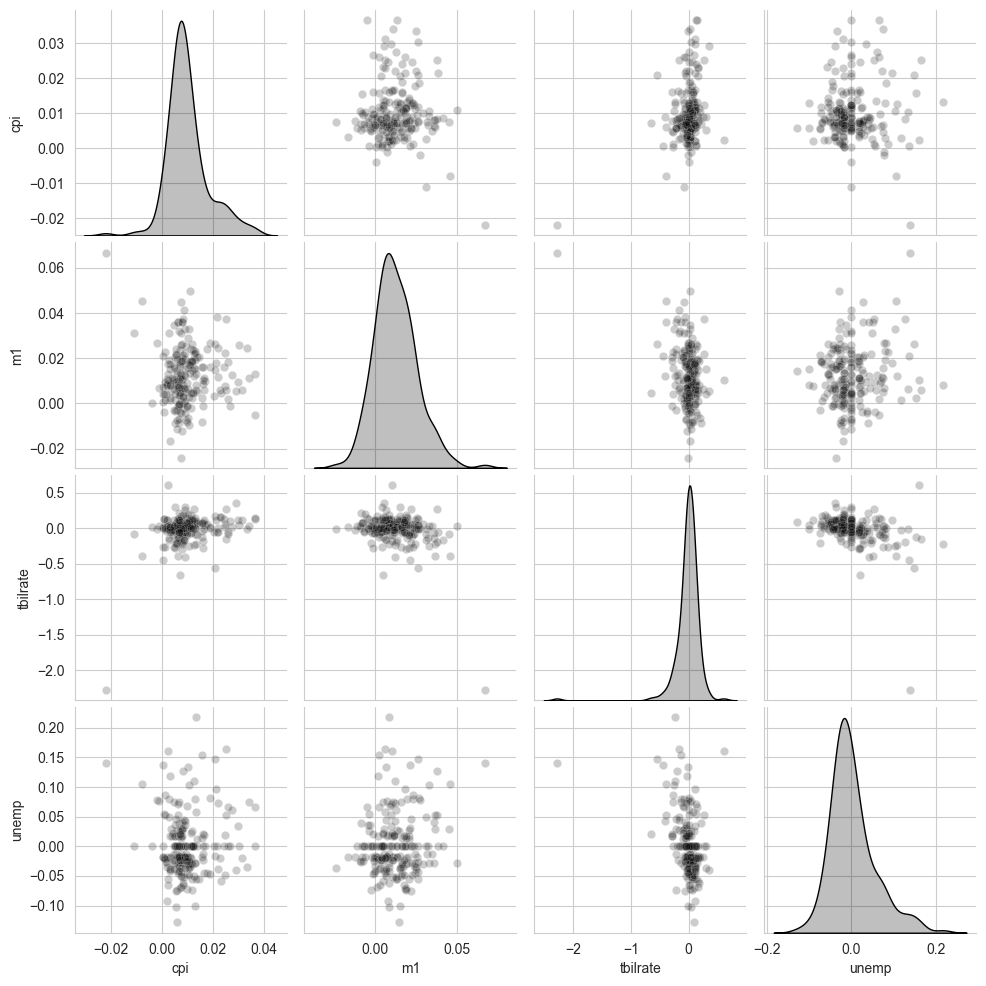

In [63]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### Facet Grids and Categorical Data
What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a *facet grid*, which is a two-dimensional layout of plots where the data is split across the plots on each axis based
on the distinct values of a certain variable. seaborn has a useful built-in function cat
plot that simplifies making many kinds of faceted plots split by categorical variables

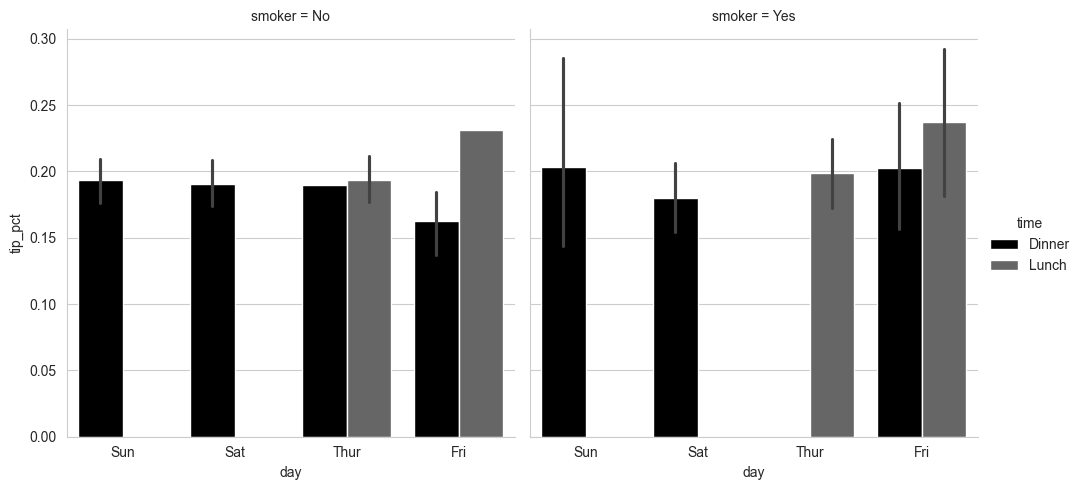

In [64]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

Instead of grouping by `"time"` by different bar colors within a facet, we can also
expand the facet grid by adding one row `per time` value

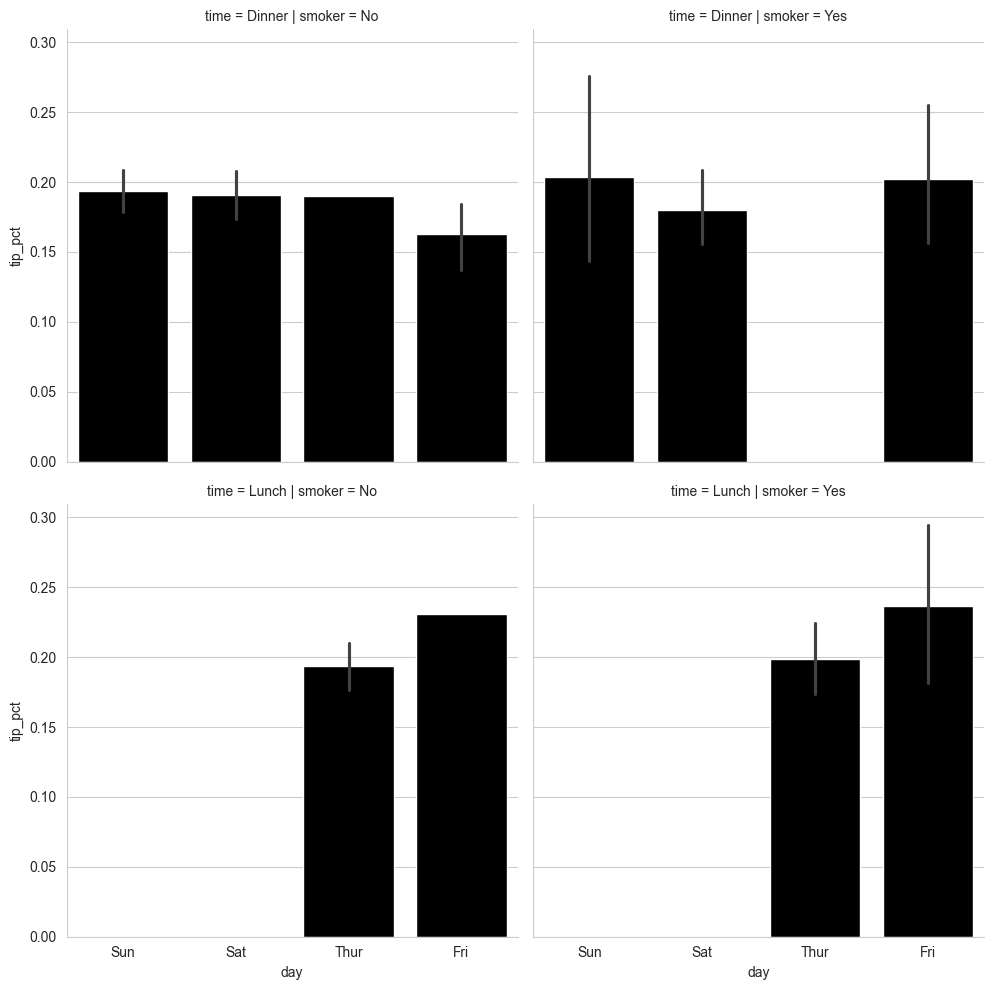

In [65]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

`catplot` supports other plot types that may be useful depending on what you are
trying to display. For example, *box plots* can be an effective visualization type

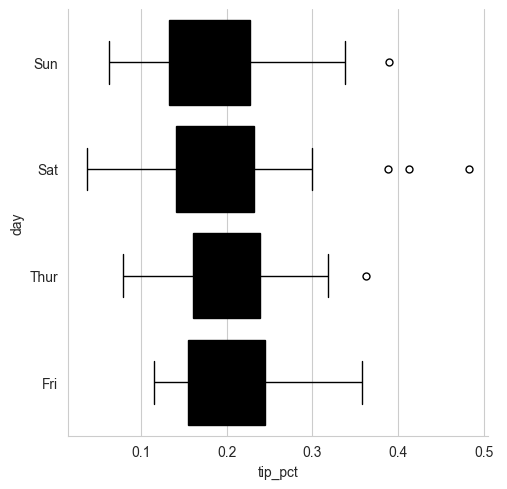

In [66]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

In [56]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## 9.3 Other Python Visualization Tools
As is common with open source, there many options for creating graphics in Python
(too many to list). Since 2010, much development effort has been focused on creating
interactive graphics for publication on the web. With tools like **Altair**, **Bokeh**, and
**Plotly**, it’s now possible to specify dynamic, interactive graphics in Python that are
intended for use with web browsers.

For creating static graphics for print or web, I recommend using matplotlib and
libraries that build on matplotlib, like pandas and seaborn, for your needs. For other
data visualization requirements, it may be useful to learn how to use one of the other
available tools. I encourage you to explore the ecosystem as it continues to evolve and
innovate into the future.

An excellent book on data visualization is *Fundamentals of Data Visualization* by
Claus O. Wilke (O’Reilly), which is available in print or on Claus’s website at **https://
clauswilke.com/dataviz**.

## 9.4 Conclusion